More python solution to check null values

In [68]:
import pandas as pd
import numpy as np

In [3]:
pd.Series([True, True, True]).all()

True

In [4]:
pd.Series([True, False , False]).any()

True

In [5]:
pd.Series([True, False , False]).all()

False

In [6]:
pd.Series([1, np.nan]).isnull().any()

True

In [7]:
pd.Series([1, 2]).isnull().any()

False

# Finding Unique Values

In [10]:
df= pd.DataFrame({
    'Sex': ['M', 'F', 'M', 'D', 'F'],
    'Name': ['Kush', 'Seema', 'Luv', 'Marie', 'Loly']
}, columns=['Sex', 'Name'])

In [11]:
df

,Sex,Name
0,M,Kush
1,F,Seema
2,M,Luv
3,D,Marie
4,F,Loly


In [12]:
df['Sex'].unique()

array(['M', 'F', 'D'], dtype=object)

In [13]:
df['Sex'].value_counts()

F    2
M    2
D    1
Name: Sex, dtype: int64

In [14]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    M
3    F
4    F
Name: Sex, dtype: object

In [15]:
df

,Sex,Name
0,M,Kush
1,F,Seema
2,M,Luv
3,D,Marie
4,F,Loly


In [20]:
ser= pd.Series(
['ansh', 'anshita', 'ansh', 'anshi'],
index= ['n1', 'n2', 'n3', 'n4'])

In [21]:
ser

n1       ansh
n2    anshita
n3       ansh
n4      anshi
dtype: object

In [22]:
ser.duplicated()            #top to down

n1    False
n2    False
n3     True
n4    False
dtype: bool

In [27]:
ser.duplicated(keep= 'last')               #bottom to up

n1     True
n2    False
n3    False
n4    False
dtype: bool

In [25]:
ser.duplicated(keep= False)      

n1     True
n2    False
n3     True
n4    False
dtype: bool

In [26]:
ser.drop_duplicates()

n1       ansh
n2    anshita
n4      anshi
dtype: object

In [28]:
ser.drop_duplicates(keep='last')      

n2    anshita
n3       ansh
n4      anshi
dtype: object

In [29]:
ser.drop_duplicates(keep=False)      

n2    anshita
n4      anshi
dtype: object

# Duplicates in DataFrames

In [45]:
df= pd.DataFrame({
'names':['ansh', 'anshita', 'ansh', 'ansh'],
'id': ['n1', 'n2', 'n1', 'n4']}, 
columns= ['names', 'id'])

In [46]:
df

,names,id
0,ansh,n1
1,anshita,n2
2,ansh,n1
3,ansh,n4


In [48]:
df.duplicated()                #duplicated means all the column values should be duplicated

0    False
1    False
2     True
3    False
dtype: bool

In [49]:
df.duplicated(subset= 'names')               #customize using subset

0    False
1    False
2     True
3     True
dtype: bool

In [50]:
df.duplicated(subset= 'names', keep='last')   

0     True
1    False
2     True
3    False
dtype: bool

In [51]:
df.drop_duplicates()

,names,id
0,ansh,n1
1,anshita,n2
3,ansh,n4


In [52]:
df.drop_duplicates(subset='names')

,names,id
0,ansh,n1
1,anshita,n2


In [53]:
df.drop_duplicates(subset='names', keep='last')

,names,id
1,anshita,n2
3,ansh,n4


# Splitting Columns

In [77]:
df= pd.DataFrame({
    'Data': [
        '1987_M_US _1', 
        '19901_M_UK_1',
        '1992_F_US_2',
        '1995_F_I  T_2'
    ]
})

In [78]:
df

,Data
0,1987_M_US _1
1,19901_M_UK_1
2,1992_F_US_2
3,1995_F_I T_2


In [79]:
df['Data'].str.split('_')

0     [1987, M, US , 1]
1     [19901, M, UK, 1]
2      [1992, F, US, 2]
3    [1995, F, I  T, 2]
Name: Data, dtype: object

In [80]:
df['Data'].str.split('_', expand= True)

,0,1,2,3
0,1987,M,US,1
1,19901,M,UK,1
2,1992,F,US,2
3,1995,F,I T,2


In [81]:
df

,Data
0,1987_M_US _1
1,19901_M_UK_1
2,1992_F_US_2
3,1995_F_I T_2


In [82]:
df= df['Data'].str.split('_', expand= True)

In [83]:
df

,0,1,2,3
0,1987,M,US,1
1,19901,M,UK,1
2,1992,F,US,2
3,1995,F,I T,2


In [84]:
df.columns= ['Year', 'Sex', 'Country', 'House']

In [85]:
df

,Year,Sex,Country,House
0,1987,M,US,1
1,19901,M,UK,1
2,1992,F,US,2
3,1995,F,I T,2


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

# Global API

Matplotlib's default pyplot API has a global, MATLAB- style like interface

In [87]:
x= np.arange(-10, 11)

Text(0.5, 1.0, 'My Plot')

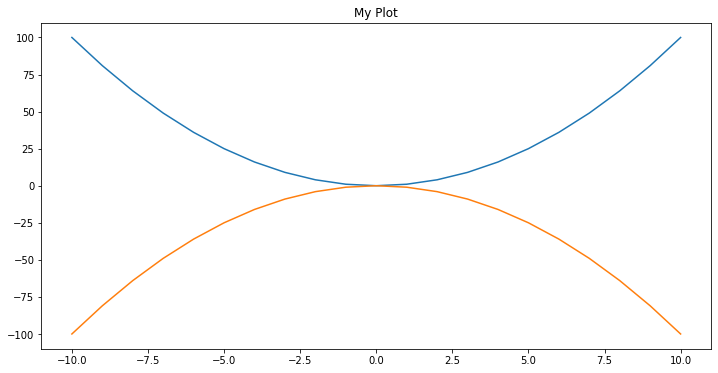

In [88]:
plt.figure(figsize= (12, 6))
plt.plot(x, x**2)
plt.plot(x, -1*(x**2))
plt.title("My Plot")

Text(0, 0.5, 'X Squared')

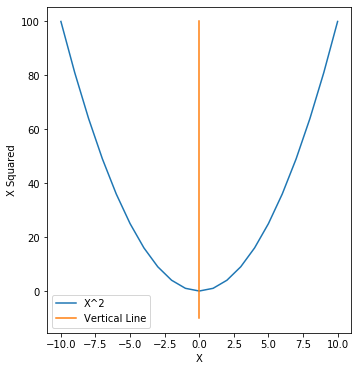

In [89]:
plt.figure(figsize=(12, 6))
plt.title("My nice plot")

plt.subplot(1, 2, 1)   #rows, columns, panel selected
plt.plot(x, x**2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')



Text(0, 0.5, 'X Squared')

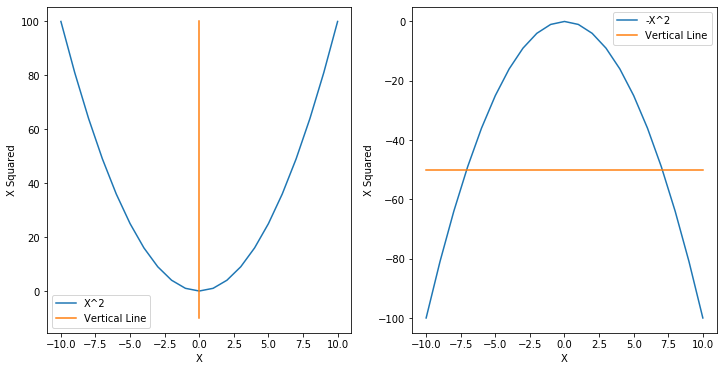

In [90]:
plt.figure(figsize=(12, 6))
plt.title("My nice plot")

plt.subplot(1, 2, 1)   #rows, columns, panel selected
plt.plot(x, x**2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)       #last value -2 signifies, 2nd plot
plt.plot(x, -1*(x**2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')


# OOP Interface 

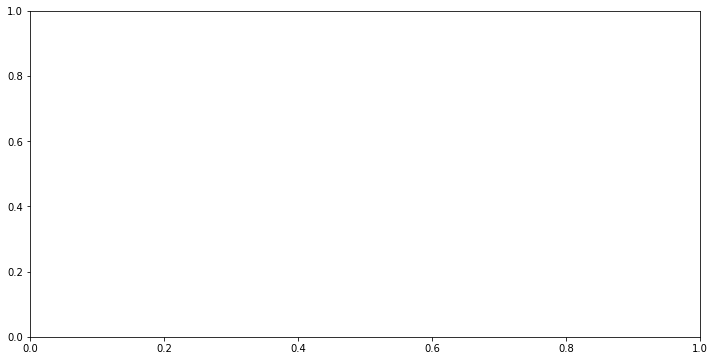

In [97]:
fig , axes= plt.subplots(figsize=(12, 6))

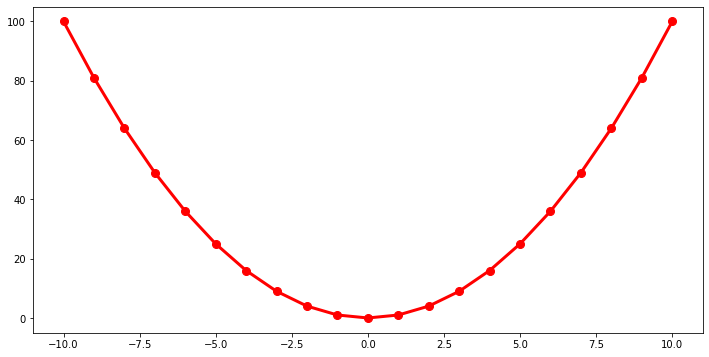

In [98]:
axes.plot(
x, (x**2), color='red', linewidth=3,
    marker='o', markersize='8', label='X^2'
)
fig

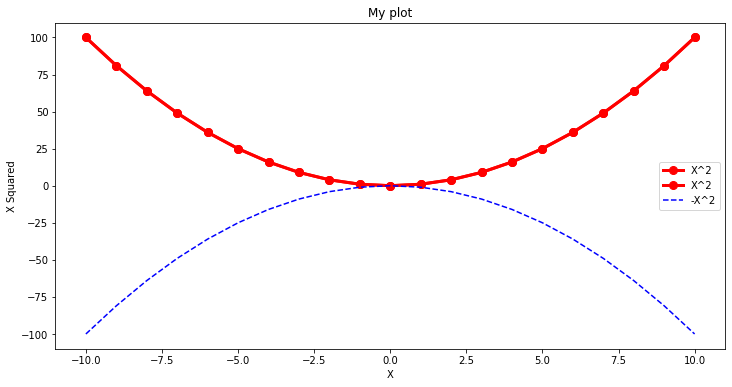

In [99]:
axes.plot(
x, (x**2), color='red', linewidth=3,
    marker='o', markersize='8', label='X^2')

axes.plot(x, -1*(x**2), 'b--', label= '-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My plot")
axes.legend()
fig

Text(0.5, 1.0, 'Plot')

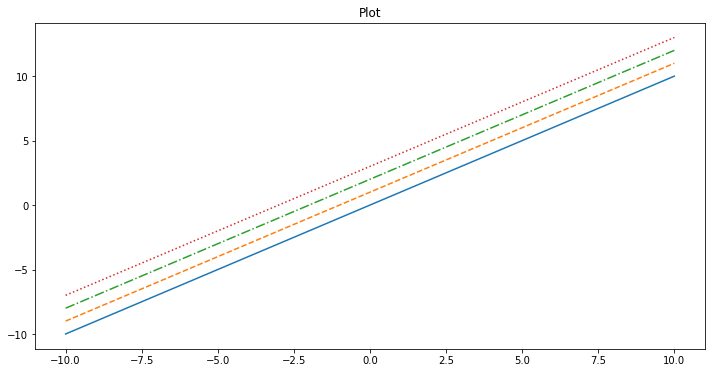

In [104]:
fig, axes= plt.subplots(figsize= (12, 6))

axes.plot(x, x+0, linestyle="solid")
axes.plot(x, x+1, linestyle="dashed")
axes.plot(x, x+2, linestyle="dashdot")
axes.plot(x, x+3, linestyle="dotted")

axes.set_title("Plot")

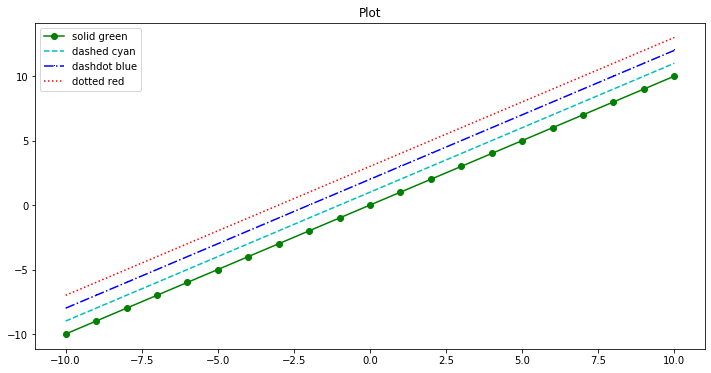

In [109]:
fig, axes= plt.subplots(figsize= (12, 6))

axes.plot(x, x+0, '-og', linestyle="solid", label='solid green')
axes.plot(x, x+1, '--c' ,linestyle="dashed", label='dashed cyan')
axes.plot(x, x+2, '-,b' ,linestyle="dashdot", label='dashdot blue')
axes.plot(x, x+3, ':r' ,linestyle="dotted", label='dotted red')

axes.set_title("Plot")

axes.legend()